In [24]:
import numpy as np

def move_from_A_to_B_with_x1_displacement(A, B, delta_x1):
    """
    Move from point A to point B in n-dimensional space with a desired movement in the x1 dimension.
    
    Parameters:
    - A: list or np.array, coordinates of the starting point A
    - B: list or np.array, coordinates of the target point B
    - delta_x1: float, the desired displacement in the x1 dimension
    
    Returns:
    - P: np.array, coordinates of the new point after moving delta_x1 along x1-axis
    """
    A = np.array(A)
    B = np.array(B)
    
    # Calculate direction vector from A to B
    D = B - A
    
    # Calculate the scaling factor t for the desired movement in x1
    t = delta_x1 / D[0]  # D[0] is the x1 component of the direction vector
    
    # Calculate the new point P based on t
    P = A + t * D
    
    return P

# Example usage
A = [1, 2, 3]  # Starting point in 3D space
B = [4, 5, 6]  # Target point in 3D space
delta_x1 = 1.5  # Desired movement in x1 dimension

P = move_from_A_to_B_with_x1_displacement(A, B, delta_x1)
print("New point P with desired x1 movement:", P)

New point P with desired x1 movement: [2.5 3.5 4.5]


In [25]:
import numpy as np

def are_points_collinear(A, B, C, tolerance=1e-9):
    """
    Check if points A, B, and C are collinear in n-dimensional space.
    
    Parameters:
    - A, B, C: lists or np.array, coordinates of the points in n-dimensional space
    - tolerance: float, a small value to handle numerical precision issues
    
    Returns:
    - bool: True if the points are collinear, False otherwise
    """
    A, B, C = np.array(A), np.array(B), np.array(C)
    
    # Compute direction vectors
    D_AB = B - A
    D_BC = C - B
    
    # Check if any component of D_BC is zero (to avoid division by zero)
    # Only compare non-zero ratios
    non_zero_indices = np.where(D_BC != 0)
    
    if len(non_zero_indices[0]) == 0:
        # If all components are zero, then the points are identical (hence collinear)
        return True
    
    # Calculate the ratios of the corresponding components
    ratios = D_AB[non_zero_indices] / D_BC[non_zero_indices]
    
    # Check if all ratios are (approximately) the same
    return np.all(np.abs(ratios - ratios[0]) < tolerance)

# Example usage
A = [1, 2, 3]
B = [4, 5, 6]
C = [2.5, 3.5, 4.5]

collinear = are_points_collinear(A, B, C)
print("Are points A, B, and C collinear?", collinear)


Are points A, B, and C collinear? True


# Data Pipeline 

- Reading from dataset SVM_Dataset2.csv
- Fitting the SVM classifier to the dataset
- Plot the scatter points of the decision boundary  

1
1
1


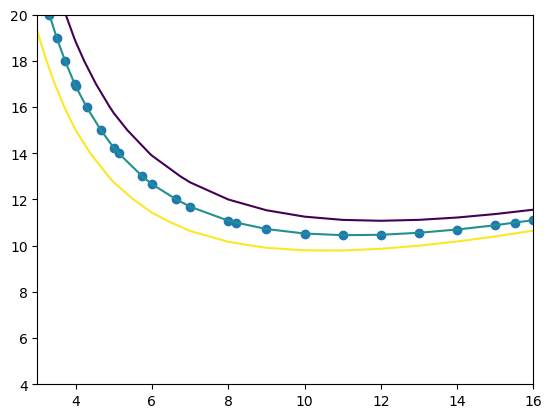

In [26]:
import numpy as np
import pandas as pd
from sklearn import svm
import matplotlib.pyplot as plt


# Reading in the dataset
df=pd.read_csv('SVM_Dataset2.csv')

# First feature
X1=df['x1']

# Second feature
X2=df['x2']

# Creating feature matrix from a set of two features
X_train=np.array(list(zip(X1,X2)))

# Getting labels of the features in the feature matrix
y_train=df['y'].values
# svm_classifier = svm.SVC(kernel='linear', C=10)
#svm_classifier = svm.SVC(kernel='poly', C=10)

# SVM classifier with polynomial decision boundary
svm_classifier = svm.SVC(kernel='poly',C=10, degree=2)
# svm_classifier = svm.SVC(kernel='rbf', gamma=0.1, C=100)

svm_classifier.fit(X_train, y_train)

X = X_train
x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max),np.arange(x2_min, x2_max))

Z = svm_classifier.decision_function(np.array([xx1.ravel(), xx2.ravel()]).T).reshape(xx1.shape)

contours = plt.contour(xx1, xx2, Z, levels=[-1, 0, 1])
x_coords, y_coords = None, None
i = 0 
for collection in contours.collections:
    print(len(collection.get_paths()))
    for path in collection.get_paths():
        if i == 1: 
            vertices = path.vertices
            x_coords = vertices[:, 0]
            y_coords = vertices[:, 1]
            plt.scatter(x_coords, y_coords)
        i+=1

In [27]:
# The Blue Line
np.c_[x_coords, y_coords]

array([[16.        , 11.10533536],
       [15.50553445, 11.        ],
       [15.        , 10.88515957],
       [14.        , 10.70026713],
       [13.        , 10.55877732],
       [12.        , 10.47168431],
       [11.        , 10.45403791],
       [10.        , 10.52700365],
       [ 9.        , 10.72132062],
       [ 8.20976194, 11.        ],
       [ 8.        , 11.08356332],
       [ 7.        , 11.68830133],
       [ 6.64366506, 12.        ],
       [ 6.        , 12.66133086],
       [ 5.75078663, 13.        ],
       [ 5.12728088, 14.        ],
       [ 5.        , 14.23681299],
       [ 4.66281816, 15.        ],
       [ 4.28813442, 16.        ],
       [ 4.        , 16.90784741],
       [ 3.9748504 , 17.        ],
       [ 3.72315009, 18.        ],
       [ 3.50434907, 19.        ],
       [ 3.31255659, 20.        ]])

# Cubic Interpolation

- We apply cubic interpolation to the blue line above to produce a larger meshgrid of points on the decision boundary
- We define $N = 10,000$ - meaning that we have 10,000 evenly spaced points for the interpolation of the blue boundary

In [28]:
from scipy.interpolate import interp1d

N = 10000
f = interp1d(x_coords, y_coords, kind='cubic')
X_pred = np.linspace(np.min(x_coords), np.max(x_coords), N)[:, np.newaxis]
Y_pred = f(X_pred)

In [29]:
np.c_[X_pred, Y_pred].shape

(10000, 2)

In [30]:
np.c_[x_coords, y_coords].shape

(24, 2)

# Direction Function 

- The direction function is meant to add the displacement vector to a data point in the training set such that it would pass the boundary
- Due to numerical error, it does not completely go over the boundary, so we add a small margin (displacement) value such that it creeps over the boundary 

# Displacement Function 
- Takes in data point, the x, y meshgrid of points
- Computes a set of vectors between each gridpoint namely ($x_k$ - $x_{k-1}$, $y_k$ - $y_{k-1}$) for each k from 1 to $N$ where $N$ is the number of points
- Finds the distance vector between grid point ($x_{k-1}$, $y_{k-1}$) and the point ($x$, $y$) where ($x$, $y$) $\in D$ where D is the training set 
- Then applies direction function to get the point that crosses the boundary as well as the reflected point

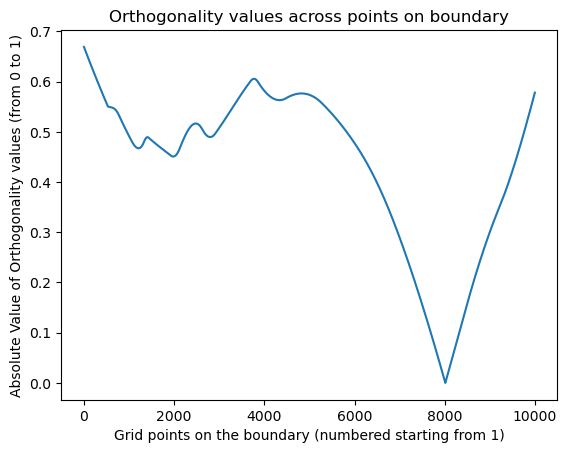

-6.1439539561284136
0.014762814791467349
6.64562591942699


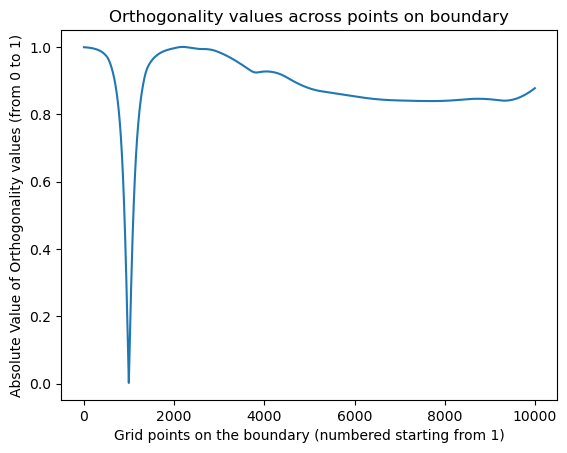

0.9996782991356241
-0.03944843251780128
-1.02864062866918
[[ 4.58508346 15.23220794]]
[[ 5.15016693 15.44441588]]


In [55]:
def direction_func(data_pt, final_dist_vec, scaler, direction, x1=0): 
    if direction == "negative": 
        x1 = x1 * -1
    margin = np.array([x1, x1]) 
    modified_pt = data_pt + final_dist_vec*scaler + margin
    return modified_pt

def displacement_func(X_pred, Y_pred, data_pt, margin=0): 
    #X_pred[1:-1], y_pred[1:-1]
    X_pred = X_pred.flatten() 
    Y_pred = Y_pred.flatten()

    min_point_vector = (-1, -1)
    min_orthogonal = 1

    vertices, ortho_values = [], [] 

    for k in range(1, len(X_pred)-1): 
        dist_x, dist_y = X_pred[k] - X_pred[k-1], Y_pred[k] - Y_pred[k-1]
        point_dist_x, point_dist_y = X_pred[k-1] - data_pt[0], Y_pred[k-1] - data_pt[1]

        line_vector = np.array([dist_x, dist_y]).T 
        point_vector = np.array([point_dist_x, point_dist_y]) 

        # Taking the magnitudes of both vectors
        line_vector_m = np.linalg.norm(line_vector) 
        point_vector_m = np.linalg.norm(point_vector) 

        line_vector_norm = line_vector / line_vector_m
        point_vector_norm = point_vector / point_vector_m

        orthogonal = np.matmul(line_vector_norm, point_vector_norm) 

        # Taking the absolute value since we only that value of orthogonality is as close to 0 as possible
        abs_orthogonal = abs(orthogonal) 
        
        if abs_orthogonal < min_orthogonal: 
            min_orthogonal = abs_orthogonal
            min_point_vector = (X_pred[k-1], Y_pred[k-1]) 
        
        vertices.append(k-1)
        ortho_values.append(abs_orthogonal)
        
    # This is a vector that points towards the decision boundary from data point
    min_point_vector = np.array([min_point_vector[0], min_point_vector[1]]) 
    np_data_pt = np.array([data_pt[0], data_pt[1]]) 

    final_dist_vector = min_point_vector - np_data_pt
    np_data_pt_reshaped = np_data_pt.reshape(1, -1)  
    # norm_vector = final_dist_vector / magnitude 
    Z = svm_classifier.decision_function(np_data_pt_reshaped)
    if Z[0] < 0: 
        modified_pt = direction_func(np_data_pt, final_dist_vector, 1, 'negative', x1=margin)
        reflected_pt = direction_func(np_data_pt, final_dist_vector, 2, 'negative', x1=0)
    else: 
        modified_pt = direction_func(np_data_pt, final_dist_vector, 1, 'positive', x1=margin)
        reflected_pt = direction_func(np_data_pt, final_dist_vector, 2, 'positive', x1=0)

    modified_pt = np.array([modified_pt[0], modified_pt[1]])
    modified_pt = modified_pt.reshape(1, -1)   
    reflected_pt = np.array([reflected_pt[0], reflected_pt[1]])
    reflected_pt = reflected_pt.reshape(1, -1)   
    ZMOD = svm_classifier.decision_function(modified_pt)
    ZREF = svm_classifier.decision_function(reflected_pt)

    vertices = [vertex+1 for vertex in vertices]

    plt.plot(vertices, ortho_values)
    plt.xlabel('Grid points on the boundary (numbered starting from 1)')
    plt.ylabel('Absolute Value of Orthogonality values (from 0 to 1)')
    plt.title('Orthogonality values across points on boundary')
    plt.show()

    print(Z[0]) 
    print(ZMOD[0])
    print(ZREF[0]) 

    return modified_pt, reflected_pt, min_orthogonal

modified_pt, reflected_pt, min_orthogonal = displacement_func(X_pred, Y_pred, X_train[5], margin=0.01)
modified_pt, reflected_pt, min_orthogonal = displacement_func(X_pred, Y_pred, X_train[10], margin=0.01)

print(modified_pt)
print(reflected_pt)

# Point across the boundary

The point that goes across the boundary in the orthogonal distance from the 11th row data point is $(4.585, 15.232)$. 

In [32]:
print(modified_pt)

[[ 4.57508346 15.22220794]]


# Orthogonality value 

Given that this orthogonality value is close to 0, this means that the vector originating from $(4.575, 15.222)$ is approximately normal. 

In [33]:
print(min_orthogonal)

0.0018886063732180304


# Collinearity

As a sanity check, we check the collinearity of the original data point, the modified data point over the boundary, and the reflected data point. 

Collinearity is done for all points in the dataset.

In [34]:
for r in range(X_train.shape[0]):
    data_pt = X_train[r]
    modified_pt, reflected_pt, _ = displacement_func(X_pred, Y_pred, data_pt)
    collinear = are_points_collinear(data_pt, modified_pt, reflected_pt)
    assert collinear
print("---------------------------------------------------------")
print("Collinearity is true for all ")

-7.831029015309255
-0.01600560775669635
8.737963389622493
-0.9993430147336397
0.012497417749784745
0.9655713201166805
-10.123192826300837
-0.010854008111508051
11.773096975113226
-8.831712495691832
-0.009933322253800725
9.197909733555143
-6.845579753682003
-0.0007637391680219707
6.640862915346901
-6.1439539561284136
-0.001170120128890062
6.64562591942699
-2.5042194591899687
0.0015611462559235179
2.5917345920062616
-6.427815867390976
-0.0172375892632175
7.011805572415042
-12.599482962989
-0.0003604674477202252
14.437652482058937
-10.771124354736301
-0.0003604674477202252
10.816740524028361
0.9996782991356241
-0.018089723863496943
-1.02864062866918
0.9999887187291421
0.000685429566757989
-1.0401032752745039
1.6079403940010053
0.01155555450186796
-1.7547919643504173
1.183667050188916
-0.014161526632292976
-1.2879196891125417
2.122469134901749
0.00427103136674134
-2.252222777942009
3.4710981107196375
-0.001411963614188494
-3.6234478929246023
8.269118736004259
-9.501950562196271e-05
-8.3423

# Gradient Descent

As an additional sanity check, we apply gradient descent to the cubic interpolation function and find the optimal point on the interpolated boundary that minimizes the distance between the data point and the decision boundary. 

$r = 5$ indicates that gradient descent is done for the sixth row of the SVM dataset.

C:\Users\Compuworld\AppData\Local\Temp\ipykernel_31684\1479259894.py:6: DeprecationWarning: scipy.misc.derivative is deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. You may consider using findiff: https://github.com/maroba/findiff or numdifftools: https://github.com/pbrod/numdifftools
  yprime = derivative(f, x2, dx=1e-6)


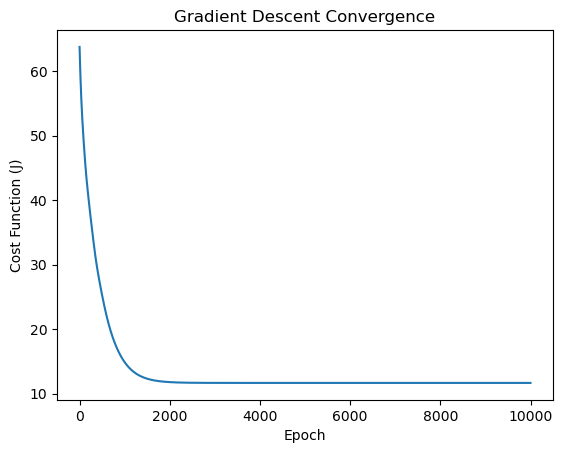

13.47856485993286 10.620954181683329


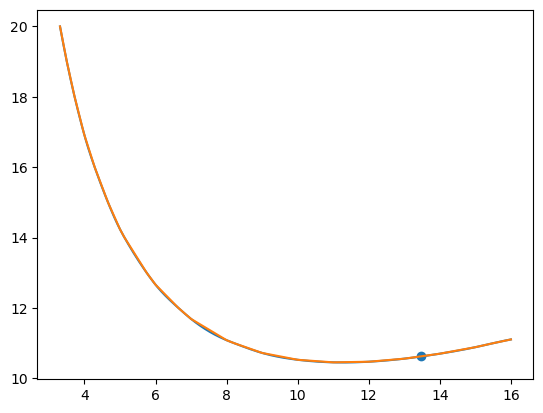

In [38]:
from scipy.misc import derivative

r = 5

def dx(x1, y1, x2): 
    yprime = derivative(f, x2, dx=1e-6)
    return 2*(x2-x1) + 2*yprime*(f(x2)-y1)

def J(x1, x2, y1): 
    return (x2-x1)**2 + (f(x2)-y1)**2

def gradient_descent(x1, x2, y1): 
    epochs = 10000
    lr = 0.001 

    J_values = [] 
    epochs_list = [] 

    for epoch in range(epochs): 
        x2 = x2 - lr * dx(x1, y1, x2)
        valueOfJ = J(x1, x2, y1)
        J_values.append(valueOfJ)
        epochs_list.append(epoch) 

    plt.plot(epochs_list, J_values)
    plt.xlabel('Epoch')
    plt.ylabel('Cost Function (J)')
    plt.title('Gradient Descent Convergence')
    plt.show()

    return x2

x2 = gradient_descent(X_train[r,0], 5, X_train[r,1])
x_final = x2
y_final = f(x2) 
    

plt.plot(X_pred, Y_pred)
plt.plot(x_coords, y_coords)
plt.scatter(x_final, y_final)
print(x_final, y_final)

# Dot Product Calculation 

Below calculates the dot product between the vector originating from $(13.478, 10.6209)$ on the boundary and vector $(13.478, 10.6209)$ - $(11,15)$

In [39]:
vec1 = np.array([0.0005, f(x_final+0.0005)-f(x_final)]) 
vec2 = np.array([X_train[r,0]-x_final, X_train[r,1]-f(x_final)]).T

vec1 = vec1 / np.linalg.norm(vec1) 
vec2 = vec2 / np.linalg.norm(vec2) 
print(np.matmul(vec1, vec2).item())

1.10526784965585e-05
